In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
X = pickle.load(open('./Training_files/PetImages/X_100.pickle','rb'))
y = pickle.load(open('./Training_files/PetImages/y.pickle','rb'))

In [6]:
 X = X/255.0

In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Train on 17462 samples, validate on 7484 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
17462/17462 [==============================] - 211s 12ms/sample - loss: 0.6384 - acc: 0.6248 - val_loss: 0.5846 - val_acc: 0.6954
Epoch 2/10
17462/17462 [==============================] - 196s 11ms/sample - loss: 0.5277 - acc: 0.7402 - val_loss: 0.5387 - val_acc: 0.7297
Epoch 3/10
17462/17462 [==============================] - 192s 11ms/sample - loss: 0.4564 - acc: 0.7848 - val_loss: 0.5034 - val_acc: 0.7592
Epoch 4/10
17462/17462 [==============================] - 207s 12ms/sample - loss: 0.3884 - acc: 0.8256 - val_loss: 0.5116 - val_acc: 0.7612
Epoch 5/10
17462/17462 [==============================] - 194s 11ms/sample - loss: 0.3169 - acc: 0.8623 - val_loss: 0.5348 - val_acc: 0.7638
Epoch 6/10
17462/17462 [==============================] - 182s 10ms/sample - loss: 0.2300 - acc: 0.9029 - val_loss: 0.6162 - v

In [8]:
model.save('./Models/Cats_Dogs_10epo_img_100x100.model')

### 10 Random image from Petimages, 5 cats, 5 dogs

In [15]:
from random import randint
import cv2
import os

Pred: Dog


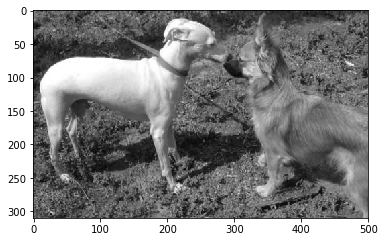

Pred: Dog


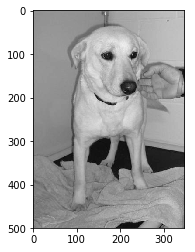

Pred: Dog


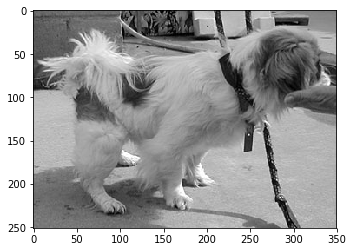

Pred: Dog


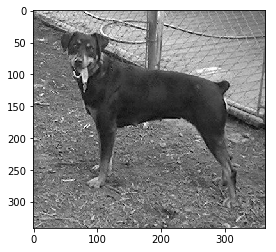

Pred: Cat


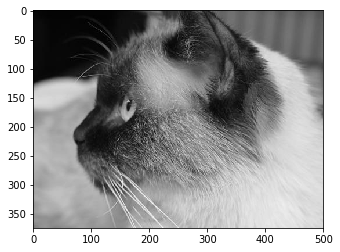

Pred: Cat


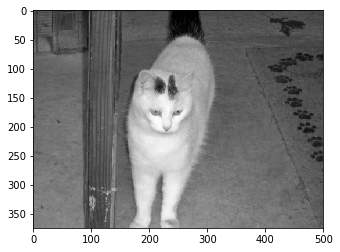

Pred: Cat


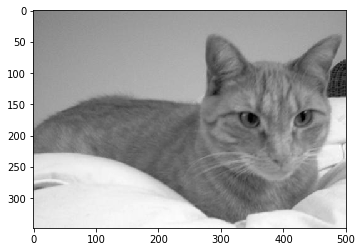

Pred: Dog


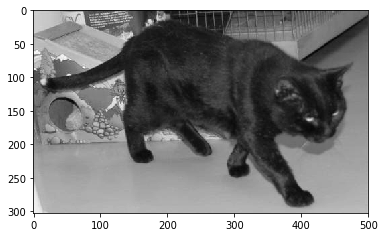

In [46]:
Datadir = './Training_files/PetImages/'
Categories = ['Dog', 'Cat']

n_rand = 10
IMG_SIZE = 100

for category in Categories:
    path = os.path.join(Datadir,category)
    for rnd in range(n_rand):
        try:
            img = str(randint(1,np.shape(X)[0])) + '.jpg'
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = new_array / 255.0
            m_X = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
            print("Pred: " + Categories[np.round(model.predict(m_X)).astype(int)[0][0]])
            plt.imshow(img_array, cmap='gray')
            plt.show()
        except Exception as e:
            pass

In [40]:
Categories[np.round(model.predict(m_X)).astype(int)[0][0]]

'Cat'

In [29]:
model.predict(new_array)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (100, 100)